# Introduction

This notebook is used to calculate and plot UKESM1 simulations.

### Import packages and define functions for calculations

In [1]:
'''Import packages for loading data, analysing, and plotting'''
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Examples to define variable name, file directory and filenames

Below are the examples of varibale name and filenames under different scenarios. Copy the appropriate format to be used in calculations.

In [3]:
'''Define variables'''
#cvdp results
reference_period='1851-1900'
ssp='ssp585'
directory='/data/aod/cvdp_cmip6/geog0121/UKESM1-0-LL_ssps.wrt_%s' %reference_period
filename='%s/UKESM1_%s_%s.cvdp_data.1850-2100.nc'%(directory,ssp,reference_period)

variable_name='ipcc_GLOBAL_all_tas'

preprocessed_file=xr.open_dataset(filename, decode_times=False)

In [4]:
global_mean_temp_ssp585=preprocessed_file.ipcc_GLOBAL_all_tas
global_mean_temp_ssp585

<xarray.DataArray 'ipcc_GLOBAL_all_tas' (time: 3012)>
array([-0.272617, -0.239207, -0.034057, ...,  7.298498,  7.501875,  7.492433],
      dtype=float32)
Coordinates:
  * time     (time) float64 0.0 1.0 2.0 3.0 ... 3.009e+03 3.01e+03 3.011e+03
Attributes:
    coordinates:    height
    history:        2019-04-05T16:02:56Z altered by CMOR: Treated scalar dime...
    original_name:  mo: (stash: m01s03i236, lbproc: 128)
    units:          C
    comment:        Area average for GLOBAL_all (extr. with 1x1o mask)
    long_name:      GLOBAL_all area_avgd temperature
    standard_name:  air_temperature
    region_name:    GLOBAL_all
    AnnCycle:       [11.235987  11.4531355 12.188142  13.198075  14.181813  1...

In [8]:
global_mean_temp_ssp585.time

<xarray.DataArray 'time' (time: 3012)>
array([0.000e+00, 1.000e+00, 2.000e+00, ..., 3.009e+03, 3.010e+03, 3.011e+03])
Coordinates:
  * time     (time) float64 0.0 1.0 2.0 3.0 ... 3.009e+03 3.01e+03 3.011e+03
Attributes:
    actual_range:   [   0. 3011.]
    standard_name:  time
    long_name:      Time
    calendar:       standard
    units:          months since 1850-01-15 00:00:00

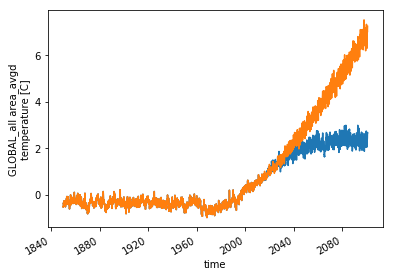

In [7]:
ssp126=xr.open_dataset("/data/aod/cvdp_cmip6/geog0121/UKESM1-0-LL_ssps.wrt_1981-2010/time_throughout_ssp126.nc")
ssp126.ipcc_GLOBAL_all_tas.plot()
ssp585=xr.open_dataset("/data/aod/cvdp_cmip6/geog0121/UKESM1-0-LL_ssps.wrt_1981-2010/time_throughout_ssp585.nc")
ssp585.ipcc_GLOBAL_all_tas.plot()

In [6]:
#raw files downloaded from ESGF
#ScenarioMIP

period='201501-204912'
ssp='ssp585'
var='ta'

directory='/data/CMIP/CMIP6/ScenarioMIP/MOHC/UKESM1-0-LL/%s/r1i1p1f2/*/%s/gn/v*' %(ssp,var)
filename='%s/%s_*_UKESM1-0-LL_%s_r1i1p1f2_gn_*.nc'%(directory,var,ssp)

#CMIP6 historical
experiment='historical'

directory='/data/CMIP/CMIP6/CMIP/MOHC/UKESM1-0-LL/%s/r1i1p1f2/*/hur/gn/v*' %experiment
filename='%s/%s_*_UKESM1-0-LL_%s_r1i1p1f2_gn_*.nc'%(directory,var,experiment)

In [7]:
print(filename)

/data/CMIP/CMIP6/CMIP/MOHC/UKESM1-0-LL/historical/r1i1p1f2/*/hur/gn/v*/ta_*_UKESM1-0-LL_historical_r1i1p1f2_gn_*.nc


# Example of cvdp output calculations (open file via xarray)

# annual temperature anomalies, seasonal precipitation anomalies

# Global and regional Geo2D maps

In [26]:


#define filenames and their directories
period1='1851-1900'
ssp1='ssp585'

directory1='/data/aod/cvdp_cmip6/geog0121/UKESM1-0-LL_ssps.wrt_%s' %period1
filename_a='%s/UKESM1_%s_%s.cvdp_data.1850-2100.nc'%(directory1,ssp1,period1)



directory2='/data/aod/cvdp_cmip6/geog0121/UKESM1-0-LL_historical.vsObs' 
filename_b='%s/UKESM1-0-LL_PresentDay.cvdp_data.1850-2014.nc'%(directory2)


# load files

expt_a_file=xr.open_dataset(filename_a,decode_times=False)
expt_b_file=xr.open_dataset(filename_b,decode_times=False)

lat=expt_a_file['lat']
lon=expt_a_file['lon']



## annual mean temperature anomalies

In [18]:

variable_name='tas_spatialmean_ann'

expt_a=expt_a_file[variable_name]
expt_b=expt_b_file[variable_name]
diff=expt_a-expt_b

print(diff)

<xarray.DataArray 'tas_spatialmean_ann' (lat: 144, lon: 192)>
array([[-1.1903648 , -1.190464  , -1.1893578 , ..., -1.186264  ,
        -1.188446  , -1.1890717 ],
       [-1.0601959 , -1.055336  , -1.053833  , ..., -1.0661659 ,
        -1.0639305 , -1.0625153 ],
       [-0.98755646, -0.97755814, -0.9699211 , ..., -1.013916  ,
        -1.0054817 , -0.9967613 ],
       ...,
       [ 0.24611473,  0.25730324,  0.26472855, ...,  0.20947838,
         0.22019386,  0.23441124],
       [ 0.2947464 ,  0.29722023,  0.30086517, ...,  0.2845707 ,
         0.28726768,  0.28975487],
       [ 0.3039322 ,  0.30389404,  0.30505753, ...,  0.30132866,
         0.30153465,  0.30287552]], dtype=float32)
Coordinates:
  * lat      (lat) float64 -89.38 -88.12 -86.88 -85.62 ... 86.88 88.12 89.38
  * lon      (lon) float64 0.9375 2.812 4.688 6.562 ... 353.4 355.3 357.2 359.1


In [28]:
diff, lon = add_cyclic_point(diff, coord=lon)


### Plotting

In [20]:
#temperatures
cmap=plt.get_cmap('bwr') #define colormap

#define colormap's range and scale
clim=[-6,6]
bounds = np.linspace(clim[0], clim[1], 21)
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)



/home/geogg134/.conda/envs/geog0121/lib/python3.6/site-packages/cartopy/io/__init__.py:260: DownloadWarning: Downloading: http://naciscdn.org/naturalearth/110m/physical/ne_110m_coastline.zip
  warnings.warn('Downloading: {}'.format(url), DownloadWarning)


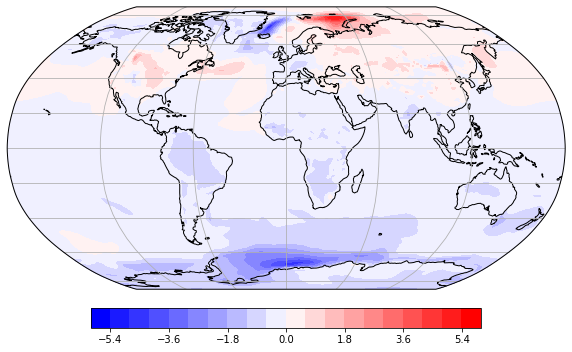

In [21]:
#Global map

projection = ccrs.Robinson()
transform=ccrs.PlateCarree()

plt.figure(figsize=(10,7))
ax = plt.axes(projection=projection)
ax.coastlines()
ax.gridlines()

fig=ax.contourf(lon,lat,diff,levels=bounds, transform=transform,cmap=cmap,norm=norm)
cax,kw = matplotlib.colorbar.make_axes(ax,location='bottom',pad=0.05,shrink=0.7)
plt.colorbar(fig,cax=cax,extend='both',**kw)

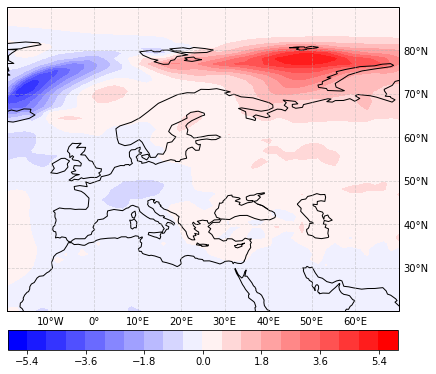

In [22]:
#Regional map
region=[-20,70,20,90] #[lon_min,lon_max,lat_min,lat_max]

projection = ccrs.PlateCarree(central_longitude=0.0, globe=None)
transform=ccrs.PlateCarree()

plt.figure(figsize=(10,7))
ax = plt.axes(projection=projection)

ax.coastlines()
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_left = False
#gl.xlocator = mticker.FixedLocator([-180, -45, 0, 45, 180])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER


fig=ax.contourf(lon,lat,diff,levels=bounds, transform=transform,cmap=cmap,norm=norm)
ax.set_extent(region, ccrs.PlateCarree())

cax,kw = matplotlib.colorbar.make_axes(ax,location='bottom',pad=0.05,shrink=0.7)
plt.colorbar(fig,cax=cax,extend='both',**kw)

#plt.savefig(figname)

## seasonal precipitation anomalies

In [27]:
#seasonal precipitation anomalies
variable_name='pr_spatialmean_djf'
expt_a=expt_a_file[variable_name]
expt_b=expt_b_file[variable_name]
diff=expt_a-expt_b

### plotting

In [29]:
#precipitations
cmap=plt.get_cmap('BrBG') #define colormap

#define colormap's range and scale

bounds = [-3,-2,-1,-0.8,-0.6,-0.4,-0.2,0,0.2,0.4,0.6,0.8,1,2,3]
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)

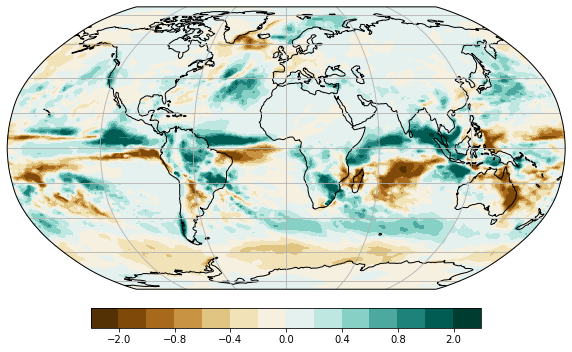

In [30]:
#Global map

projection = ccrs.Robinson()
transform=ccrs.PlateCarree()

plt.figure(figsize=(10,7))
ax = plt.axes(projection=projection)
ax.coastlines()
ax.gridlines()

fig=ax.contourf(lon,lat,diff,levels=bounds, transform=transform,cmap=cmap,norm=norm)
cax,kw = matplotlib.colorbar.make_axes(ax,location='bottom',pad=0.05,shrink=0.7)
plt.colorbar(fig,cax=cax,extend='both',**kw)

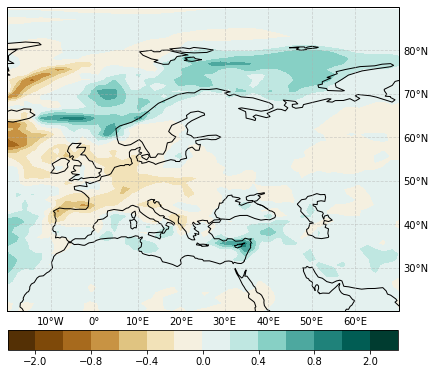

In [31]:
#Regional map
region=[-20,70,20,90] #[lon_min,lon_max,lat_min,lat_max]

projection = ccrs.PlateCarree(central_longitude=0.0, globe=None)
transform=ccrs.PlateCarree()

plt.figure(figsize=(10,7))
ax = plt.axes(projection=projection)

ax.coastlines()
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,alpha=0.5, linestyle='--')
gl.xlabels_top = False
gl.ylabels_left = False
#gl.xlocator = mticker.FixedLocator([-180, -45, 0, 45, 180])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER


fig=ax.contourf(lon,lat,diff,levels=bounds, transform=transform,cmap=cmap,norm=norm)
ax.set_extent(region, ccrs.PlateCarree())

cax,kw = matplotlib.colorbar.make_axes(ax,location='bottom',pad=0.05,shrink=0.7)
plt.colorbar(fig,cax=cax,extend='both',**kw)



# Example of raw data calculations (open via Dataset)
# Vertical profile of atmosphere

In [32]:
variable_name='ta'
filename_a='/data/CMIP/CMIP6/ScenarioMIP/MOHC/UKESM1-0-LL/ssp370/r1i1p1f2/Amon/ta/gn/v20190510/ta_Amon_UKESM1-0-LL_ssp370_r1i1p1f2_gn_201501-204912.nc'

filename_b='/data/CMIP/CMIP6/CMIP/MOHC/UKESM1-0-LL/historical/r1i1p1f2/Amon/ta/gn/v20190406/ta_Amon_UKESM1-0-LL_historical_r1i1p1f2_gn_185001-194912.nc'


In [33]:

#This cell will calculate the difference between two experiments
expt_a_file=Dataset(filename_a)
expt_a=expt_a_file[variable_name][:]
lat=expt_a_file['lat'][:]
lon=expt_a_file['lon'][:]
lev=expt_a_file['plev'][:]
expt_b_file=Dataset(filename_b)
expt_b=expt_b_file[variable_name][:]
expt_a_file.close()
expt_b_file.close()

In [34]:
#time averaged
ta_a=np.average(expt_a,axis=0)
ta_b=np.average(expt_b,axis=0)

In [35]:
#change
diff=ta_a-ta_b

#zonal changes
zonal_diff=np.nanmean(np.array(diff),axis=2)

## vertical profile of atmosphere

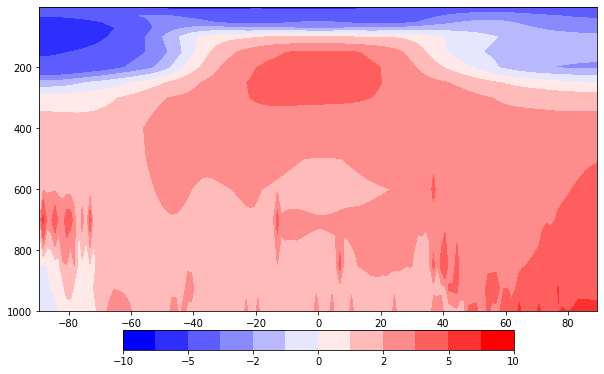

In [50]:
cmap=plt.get_cmap('bwr') #define colormap

#define colormap's range and scale

bounds = [-10,-7,-5,-3,-2,-1,0,1,2,3,5,7,10]
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)


plt.figure(figsize=(10,7))

ax = plt.axes()
ax.invert_yaxis()
fig=ax.contourf(lat,0.01*lev,np.array(zonal_diff),levels=bounds,cmap=cmap,norm=norm)
#plt.yticks(range(19),labels)

cax,kw = matplotlib.colorbar.make_axes(ax,location='bottom',pad=0.05,shrink=0.7)
plt.colorbar(fig,cax=cax,extend='both',**kw)


In [ ]:
## 1D timeseries of annual global mean teperature

In [51]:
variable_name='tas'
filename_a='/data/CMIP/CMIP6/ScenarioMIP/MOHC/UKESM1-0-LL/ssp370/r1i1p1f2/Amon/tas/gn/v20190510/tas_Amon_UKESM1-0-LL_ssp370_r1i1p1f2_gn_201501-204912.nc'



#This cell will calculate the difference between two experiments
expt_a_file=Dataset(filename_a)
expt_a=expt_a_file[variable_name][:]
lat=expt_a_file['lat'][:]
lon=expt_a_file['lon'][:]

expt_a_file.close()


In [65]:
expt_a

masked_array(
  data=[[[248.3501 , 248.35913, 248.35083, ..., 248.3667 , 248.35327,
          248.34912],
         [249.76416, 249.7002 , 249.59644, ..., 250.00146, 249.91162,
          249.83301],
         [250.66577, 250.48242, 250.344  , ..., 251.13892, 250.97656,
          250.84326],
         ...,
         [235.1333 , 235.17749, 235.20898, ..., 235.0149 , 235.03687,
          235.0957 ],
         [235.24658, 235.22314, 235.23877, ..., 235.24243, 235.24805,
          235.24902],
         [235.6206 , 235.60327, 235.59961, ..., 235.65454, 235.62646,
          235.64258]],

        [[241.23584, 241.26172, 241.27026, ..., 241.20483, 241.21265,
          241.21729],
         [243.46582, 243.42993, 243.35327, ..., 243.62744, 243.55396,
          243.5144 ],
         [245.23901, 245.20312, 245.15186, ..., 245.40576, 245.34204,
          245.26147],
         ...,
         [243.17505, 243.25928, 243.33716, ..., 242.83838, 242.95361,
          243.0813 ],
         [242.71533, 242.71997, 242.

In [53]:
weight=np.ones((lat.shape[0],lon.shape[0]))

In [60]:
weight.shape

(144, 192)

In [63]:
#area weighted average temperature
weight=np.ones((lat.shape[0],lon.shape[0]))
for i in range(lat.shape[0]):
    w=lat[i]*np.pi/180
    wc=np.cos(w)
    weight[i]=weight[i]*wc
    
ave=np.zeros(expt_a.shape[0])
for t in range(expt_a.shape[0]):
    ave[t]=np.average(expt_a[t],weights=weight)
    
weight[:,0]

array([0.01090809, 0.03271908, 0.0545145 , 0.07628397, 0.09801714,
       0.11970366, 0.1413332 , 0.16289547, 0.18438022, 0.20577721,
       0.22707626, 0.24826724, 0.26934005, 0.29028468, 0.31109114,
       0.33174954, 0.35225005, 0.3725829 , 0.39273843, 0.41270703,
       0.43247921, 0.45204555, 0.47139674, 0.49052357, 0.50941694,
       0.52806785, 0.54646743, 0.56460693, 0.5824777 , 0.60007124,
       0.61737918, 0.63439328, 0.65110545, 0.66750772, 0.6835923 ,
       0.69935153, 0.7147779 , 0.72986407, 0.74460287, 0.75898728,
       0.77301045, 0.78666571, 0.79994657, 0.81284668, 0.82535993,
       0.83748035, 0.84920218, 0.86051983, 0.87142793, 0.88192126,
       0.89199486, 0.90164391, 0.91086382, 0.91965022, 0.92799891,
       0.93590593, 0.9433675 , 0.95038008, 0.95694034, 0.96304514,
       0.96869158, 0.97387698, 0.97859887, 0.98285499, 0.98664333,
       0.98996208, 0.99280967, 0.99518473, 0.99708613, 0.99851298,
       0.99946459, 0.99994051, 0.99994051, 0.99946459, 0.99851

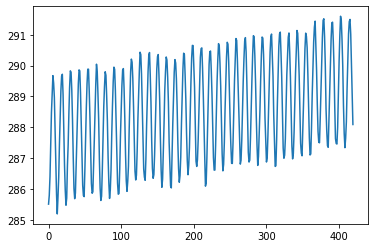

In [58]:
plt.plot(ave)

# Sea ice

In [90]:
variable_name='sic_nh_spatialmean_ann'

period1='1851-1900'
ssp1='ssp585'

directory1='/data/aod/cvdp_cmip6/geog0121/UKESM1-0-LL_ssps.wrt_%s' %period1
filename_a='%s/UKESM1_%s_%s.cvdp_data.1850-2100.nc'%(directory1,ssp1,period1)

period2='2071-2100'
ssp2='ssp585'
directory2='/data/aod/cvdp_cmip6/geog0121/UKESM1-0-LL_ssps.wrt_%s' %period2
filename_b='%s/UKESM1_%s_%s.cvdp_data.1850-2100.nc'%(directory2,ssp2,period2)

In [91]:
#This cell will calculate the difference between two experiments
expt_a_file=xr.open_dataset(filename_a,decode_times=False)
expt_a=expt_a_file[variable_name]

expt_b_file=xr.open_dataset(filename_b,decode_times=False)
expt_b=expt_b_file[variable_name]



In [98]:
# coordiantes
lon_nh=expt_a.lon2d_ice_nh
lat_nh=expt_a.lat2d_ice_nh
lon_sh=expt_a.lon2d_ice_sh
lat_sh=expt_a.lat2d_ice_sh

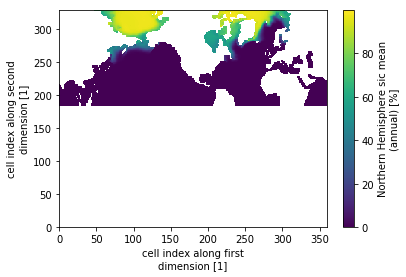

In [105]:
expt_a.plot()

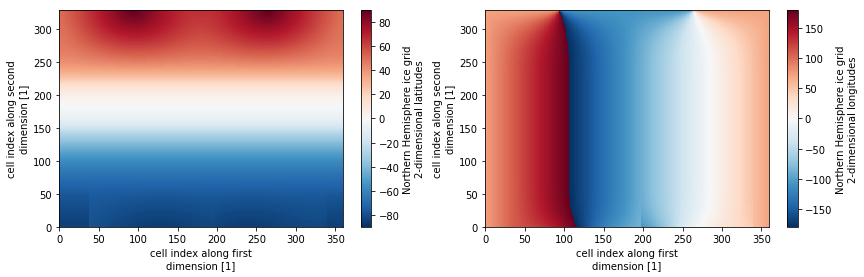

In [107]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(14,4))
lat_nh.plot(ax=ax1)
lon_nh.plot(ax=ax2)

AttributeError: 'GeoAxesSubplot' object has no attribute '_hold'

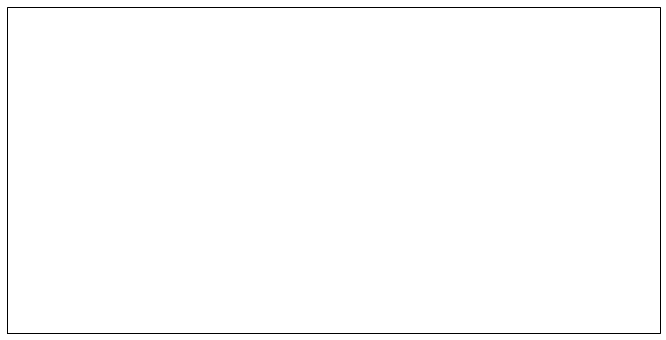

In [111]:
plt.figure(figsize=(14,6))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.pcolormesh(lon_nh,lat_nh,expt_a, transform=ccrs.PlateCarree())
ax.coastlines()

AttributeError: 'GeoAxesSubplot' object has no attribute '_hold'

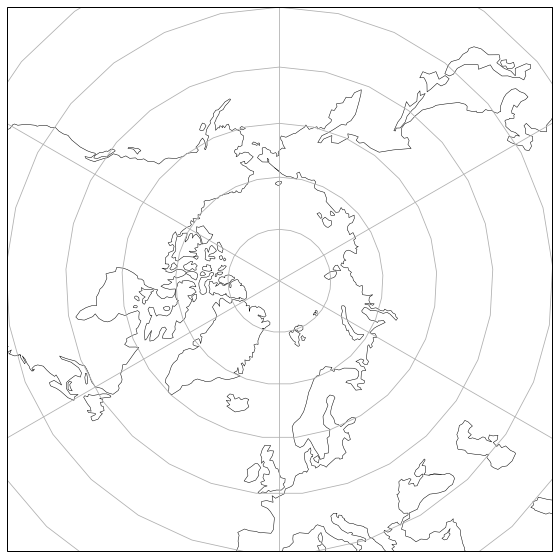

In [109]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=ccrs.NorthPolarStereo(central_longitude=0))
#ax = plt.axes(projection=ccrs.SouthPolarStereo(central_longitude=0))
cs = ax.coastlines(resolution='110m', linewidth=0.5)
cmap=plt.get_cmap('hsv')
projection = ccrs.PlateCarree(central_longitude=0.0, globe=None)

transform=ccrs.PlateCarree()

bounds = np.linspace(0, 100, 21)
norm = colors.BoundaryNorm(boundaries=bounds, ncolors=256)




ax.gridlines()
ax.set_extent([-180, 180, 40, 90], crs=ccrs.PlateCarree())
fig=ax.pcolormesh(lon_nh,lat_nh,expt_a, transform=ccrs.PlateCarree(),add_colorbar=False)


#fig=ax.contourf(lon_nh,lat_nh,expt_a,levels=bounds, transform=transform,cmap=cmap,norm=norm)
#fig=ax.contourf(lon_nh,lat_nh,expt_a,transform=transform,cmap=cmap,norm=norm)
cax,kw = matplotlib.colorbar.make_axes(ax,location='bottom',pad=0.05,shrink=0.7)
plt.colorbar(fig,cax=cax,extend='both',**kw)


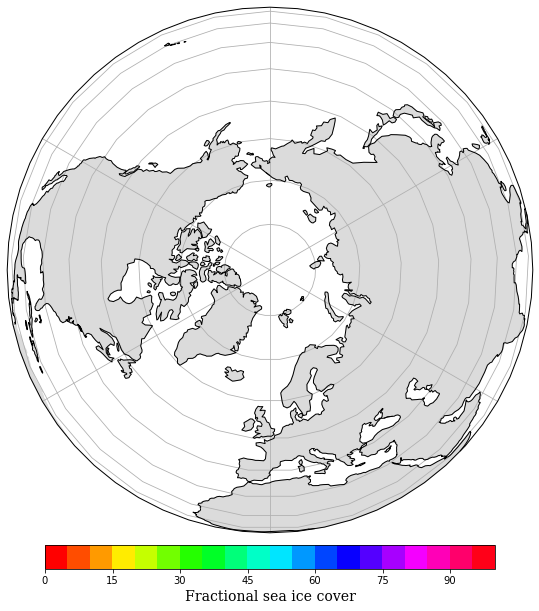

In [58]:
 # create the figure panel 
fig = plt.figure(figsize=(10,10), facecolor='w')

# create the map using the cartopy Orthographic projection, selecting the South Pole
ax1 = plt.subplot(1,1,1, projection=ccrs.Orthographic(central_latitude=90.0))

# add coastlines, gridlines, make sure the projection is maximised inside the plot, and fill in the land with colour
ax1.coastlines(resolution='110m', zorder=3) # zorder=3 makes sure that no other plots overlay the coastlines
ax1.gridlines()
ax1.set_global()
ax1.add_feature(cartopy.feature.LAND, zorder=1,facecolor=cartopy.feature.COLORS['land_alt1'])

# plot sea ice field (annual average) at zorder=0 (bottom layer) and with the reversed "Bone" colourmap
#pp = ax1.pcolormesh(expt_a.lon2d_ice_nh,expt_a.lat2d_ice_nh,expt_a, transform=ccrs.PlateCarree())
pp=ax.contourf(lon_nh,lat_nh,expt_a,levels=bounds, transform=transform,cmap=cmap,norm=norm)

# plot the maximum annual sea ice extent, where sea ice must be 15% cover, as a red line
#plt.contourf(lon,lat,LGMicemax, colors='firebrick', levels=[0.15], linewidth=2, transform=ccrs.PlateCarree())

# plot the minimum annual sea ice extent, where sea ice must be 15% cover, as a blue line
#plt.contour(lon,lat,LGMicemin, colors='deepskyblue', levels=[0.15], linewidth=2, transform=ccrs.PlateCarree())

# plot the palaeo observations over the top of the sea ice
#plt.scatter(Glon[Gice == 1],Glat[Gice == 1], s=40, c='deepskyblue', marker='o', transform=ccrs.PlateCarree())
#plt.scatter(Glon[Gice == 0],Glat[Gice == 0], s=40, c='firebrick', marker='o', transform=ccrs.PlateCarree())

# add the colourbar to the bottom of the plot.
# The first moves the bottom of the map up to 15% of total figure height, 
# the second makes the new axes for the colourbar, 
# the third makes the colourbar, and the final adds the label
fig.subplots_adjust(bottom=0.15)
cbar_ax = fig.add_axes([0.2, 0.1, 0.625, 0.033])
cbar = plt.colorbar(pp, cax=cbar_ax, orientation='horizontal')
cbar.set_label(label='Fractional sea ice cover',size=14, family='serif')

In [ ]:
## winds


In [ ]:
region=[-45, 55, 20, 80]
projection=ccrs.PlateCarree()
transform=ccrs.PlateCarree()
plt.figure(figsize=(8, 10))
ax = plt.axes(projection=projection)
ax1.coastlines()
ax1.set_extent(region, ccrs.PlateCarree())
ax1.quiver(lon, lat, u, v, transform=transform)


# Save variables to a new netcdf4 file

In [ ]:
#Create a nc file to save data


d=Dataset('filename.nc','w',format='NETCDF4')
d.createDimension('lon',lon.shape[0])  
d.createDimension('lat',lat.shape[0])  
d.createVariable("lon",'f',("lon"))  
d.createVariable("lat",'f',("lat"))  

d.variables['lat'][:]=lat     
d.variables['lon'][:]=lon 
d.close()

In [ ]:
variable_name='example'
#Add or edit nc file
d=Dataset('plotting_data/PMIP4_lig127k_Ensembles.nc','a')
d.createVariable(variable_name,'f',('lat','lon'))
d.variables[varianle_name][:]=var #variable you want to save    

d.close()